# Riding the Wave

## Traffic Flow, revisited
### A better flux model

In a typical conservation law,

$$
\begin{equation}
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0
\end{equation}
$$

where $F$ is the flux, $F=\rho u$—flux equals density times velocity.

A linear relation between traffic speed and density as a first approximation: 

$$
\begin{equation}
F(\rho) = \rho \, u_{max}\left(1 - \frac{\rho}{\rho_{max}} \right)
\end{equation}
$$

This flux model meets the two requirements, based on a qualitative view of traffic flow, that:
1. $u \rightarrow u_{max}$ and $F\rightarrow 0$ when $\rho \rightarrow 0$.
2. $u \rightarrow 0$ as $\rho \rightarrow \rho_{max}$

If the traffic speed is a linear function of density, the flux function will be quadratic. Thus, the max flux will occer when $\rho^{\star} = \rho_{max}/2$, corresponding to a traffic speed $u_{max}/2$.

Should the max flux on a given stretch of a road have a strict dependence on the max speed that the roadway allows, be it by physical restrictions or posted speed limits? I.e., do we expect the max flux to increase if we allows arbitrarily high speeds?
##### No. But there *should* be some ideal traffic speed, $u^{\star}$, corresponding to an ideal traffic density, $\rho^{\star}$, resulting in the maximum traffic flux:

$$
\begin{equation}
F_{\rm max} = \rho^{\star}u^{\star}
\end{equation}
$$

Let's introduce a flux model that is subic in $\rho$ instead of quadratic:

$$
\begin{equation}
F(\rho) = u_{\rm max}\rho (1 - A\rho - B \rho^2)
\end{equation}
$$

This still meets the first criterion listed above: $F\rightarrow 0$ when $\rho \rightarrow 0$.

Imposing the following coniditons, 

* When $\rho = \rho_{\rm max}$ traffic flux goes to zero:

$$
\begin{equation}
F(\rho_{\rm max}) = 0 = u_{\rm max}\, \rho_{\rm max}(1 - A \rho_{\rm max} - B \rho_{\rm max}^2)
\end{equation}
$$

* Based on eq. (3), maximum flux occurs when $\rho = \rho^{\star}$ and $F'(\rho^{\star}) = 0$:

$$
\begin{equation}
F'(\rho^{\star}) = 0  = u_{\rm max}(1 - 2A\rho^{\star} - 3B(\rho^{\star})^2)
\end{equation}
$$

* $u^{\star}$ is obtained when $\rho = \rho^{\star}$:

$$
\begin{equation}
u^{\star} = u_{\rm max}(1 - A \rho^{\star} - B(\rho^{\star})^2)
\end{equation}
$$

Here we have three equations and four unknowns, $A,B,\rho^{\star}, u^{\star}$. 

In practice, the ideal traffic speed could be obtained for a given road by observations. Similarly to $u_{max}$ and $\rho_{max}$ it will therefore be taken as a parameter.

### Solving the new flux equation

Here, [SymPy](http://sympy.org/en/index.html), the symbolic mathematics library of Python, will be used. 

Import Sympy, initialize $\LaTeX$ printing, and define a set of symbolic variables that will be used in calculations...

Remember that variables are not defined automatically, we have to tell Sympy that a name will correspond to a symbolic variable by using the keyword `symbol`. 

In [1]:
import sympy as sp
sp.init_printing()

(u_max, u_star, rho_max, rho_star,
     A, B) = sp.symbols('u_max u_star rho_max rho_star A B')

Sympy also allows you to create symbols with a superscript by means of the special character `^`. 

To define the three equation, we use `sympy.Eq()` in terms of symbolic variables. This function creates an equality between two Sympy obkects, passed as arguments separated by a comma.

Remember that the equal sign in Python is used for varibale assignment and it cannot be used to build symbolic equation with Sympy. That is why `sympy.Eq()` will be used to create symbolic equalities. But the equal sign is used to assign an equation to a name.

Here, below, `eq1`, `eq2`, `eq3` are names for the symbolic equalities we create with `sympy.Eq()`.

In [2]:
eq1 = sp.Eq(0, u_max * rho_max * (1 - A * rho_max - B * rho_max**2))
eq2 = sp.Eq(0, u_max * (1 - 2 * A * rho_star - 3 * B * rho_star**2))
eq3 = sp.Eq(u_star, u_max * (1 - A * rho_star - B * rho_star**2))

Let's display these equations in pretty typset mathematics just by executing their name in a code cell:

In [3]:
eq1

In [4]:
eq2

In [5]:
eq3

Assuming there is an observed value of $u_{star}$, corresponding to the ideal traffic speed, three equations with three unknowns will have a solution!

Mathematical operators cannot be used directly on the Sympy equations. Because they are really _equalities_. Let's see...

In [6]:
eq1 - 3 * eq3

Sympy only printed out what what was suggested but it did not manipulate algebraically the left and right sides of `eq1` like we are aiming for. 

In order to achieve this, let's create a new equation, perform the left-hand side (LHS) and right-right side (RHS) operations separately and then recombine them into desired result. 

In [7]:
eq4 = sp.Eq(eq2.lhs - 3 * eq3.lhs, eq2.rhs - 3 * eq3.rhs)

# Display eq4
eq4

Let's use `simplify()` to make the expression simpler. But you can imagine that the equality of an expression being simple is not well defined. 

The `sumplify()` function applies several strategies to give an equivalent reduced expression. 

In [8]:
eq4.simplify()

The `expand()` function expands bracketed factors in expressions anf group powers of symbols. 

In [9]:
# Display eq4
eq4

# Apply expand() function to eq4
eq4.expand()

The `solve()` function returnes results in a _list_, since you end up with multiple solutions for a given variable.

These linear equations only return one solution so we can skip a step and ask right away for the `[0]`-th element of the list.

In [10]:
rho_sol = sp.solve(eq4, rho_star)[0]
rho_sol

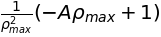

In [11]:
B_sol = sp.solve(eq1, B)[0]
B_sol

The arguments to the Sympy function `subs()` are given as (old, new) pairs, where the "new" expression subsitutes the "old" one. 

In `eq2`, we subsitute `rho_sol` in place of `rho_star` and we subsitute `B_sol` in place of `B`.

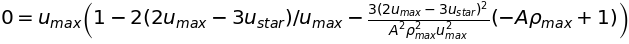

In [12]:
quadA = eq2.subs([(rho_star, rho_sol), (B, B_sol)])
quadA

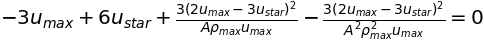

In [13]:
quadA.simplify()

Printing each root separately...

In [14]:
A_sol = sp.solve(quadA, A)

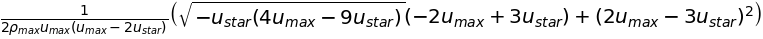

In [15]:
A_sol[0]

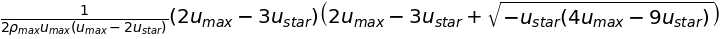

In [16]:
A_sol[1]

### Evaluating The New Flux Equation

Let's numerically evaluate the solutions for $A$ using the following values:

$$
\begin{align} 
\rho_{\rm max} &=10.0 \nonumber\\ u_{\rm max} &=1.0 \nonumber\\ u^{\star} &=0.7 \nonumber
\end{align}
$$

Evaluate the numerical result for each root of $A$ using the `evalf()` function, where it passes the numeric substitution as an argument... Evaluating both roots, and picking the positive value...

Let's try the `[0]`-th solution for $A$:

In [17]:
A_val_0 = A_sol[0].evalf(subs={u_star: 0.7, u_max: 1.0, rho_max: 10.0})
A_val_0

`[1]`-th solution for A:

In [18]:
A_val_1 = A_sol[1].evalf(subs={u_star: 0.7, u_max: 1.0, rho_max: 10.0})
A_val_1

By using the Python built-in `max` function, the positive root will be automatically picked... 

In [19]:
A_val = max(A_val_0, A_val_1)
A_val

Evaluate B numerically in the same way using the positive `A_val`:

In [20]:
B_val = B_sol.evalf(subs={rho_max: 10.0, A: A_val})
B_val

#### Turn off $\LaTeX$

In [21]:
sp.init_printing(use_latex = False)

## Green Light: Take 2

In [22]:
print(type(rho_max), type(u_max))

<class 'sympy.core.symbol.Symbol'> <class 'sympy.core.symbol.Symbol'>


In [23]:
rho_max = 10.0
u_max = 1.0

In [24]:
'''
    Computes the traffic flux along the road as a
        a 1D array of floats
        
    rho : np.ndarray, traffic density along the road
    u_max : float, max speed allowed on the road
    A : float, scaling coefficient for rho
    B : float, scaling coefficient for rho squared
    
    Returns:
    F : np.ndarray
'''

def flux(rho, u_max, A, B):
    F = rho * u_max * ( 1.0 - A * rho - B * rho**2)
    return F

In [25]:
import numpy as np
from matplotlib import pyplot as py
% matplotlib inline

# Set the font family and size to use for Matplotlib figures.
py.rcParams['font.family'] = 'serif'
py.rcParams['font.size'] = 16

In [26]:
'''
    Computes the "green light" IC.
    It consists of a shock with a linear
        distribution behind it.
        
    x : np.ndarray, locations on the road
    rho_light : float, car density at stoplight
    
    Returns:
    rho : np.ndarray, initial car density along
            the road as a 1D array of floats
'''

def rho_green(x, rho_light):
    rho = np.zeros_like(x)
    mask = np.where(x < 2.0)
    rho[mask] = rho_light * x[mask] / 2.0
    return rho

In [27]:
# Parameters
nx = 81  # number of locations on the road
L = 4.0  # length of the road
dx = L / (nx - 1)  # distance between two consecutive locations
nt = 30  # number of time steps to compute
rho_light = 5.0  # car density at the traffic light

# Locations on the road
x = np.linspace(0.0, L, num = nx)

# Initial traffic density
rho0 = rho_green(x, rho_light)

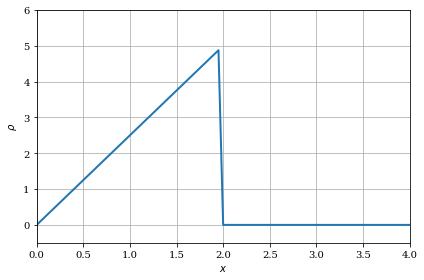

In [28]:
# Plot of the initial car density on the road
fig = py.figure(figsize=(6.0, 4.0))
py.xlabel(r'$x$')
py.ylabel(r'$\rho$')
py.grid()
line = py.plot(x, rho0, color = 'C0',
               linestyle = '-', linewidth = 2)[0]
py.xlim(0.0, L)
py.ylim(-0.5, 6.0)
py.tight_layout();

In [29]:
'''
    Computes the traffic density on the road at
        a certain time given the initial traffic density
        
    rho0 : np.ndarray, initial car density along the road
    nt : integer, number of time steps to compute
    dt : float, time-step size to integrate
    dx : float, distance between two consecutive locations
    bc_value : float, constant density at the first station
    args : list or tuple, positional arguments to be passed
            to the flux functions
            
    Returns:
    rho_hist : list of np.ndarray objects, history of the car
                    density along the road
'''

def ftbs(rho0, nt, dt, dx, bc_value, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        # Compute the flux
        F = flux(rho, *args)
        # Advance in time
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        # Left boundary condition
        rho[0] = bc_value
        # Record the time-step solution
        rho_hist.append(rho.copy())
    return rho_hist

In [30]:
# Set time-step size based on CFL limit
sigma = 1.0
dt = sigma * dx / u_max  # time-step size

# Compute the traffic density at all time steps
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, A_val, B_val)

In [31]:
from matplotlib import animation
from IPython.display import HTML

In [32]:
'''
    Updates the line y-data of the Matplotlib figure
    n : integer, time-step index
    rho_hist : list of np.ndarray objects, history of
                    the numerical solution
'''

def update_plot(n, rho_hist):
    fig.suptitle('Time Step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])

In [33]:
# Animation of the traffic density
anim = animation.FuncAnimation(fig, update_plot, frames = nt,
                              fargs = (rho_hist,), interval = 100)

# Display the vid
HTML(anim.to_html5_video())